In [1]:
import kagglehub
itsahmad_indoor_scenes_cvpr_2019_path = kagglehub.dataset_download('itsahmad/indoor-scenes-cvpr-2019')

print('Data source import complete.')


100%|██████████| 2.34G/2.34G [00:20<00:00, 124MB/s]

Extracting files...


Data source import complete.


In [6]:
!pip install openai-clip
!pip install torch
!pip install tqdm


In [2]:
import os
import torch
import torchvision
from torch.utils.data import random_split
import torchvision.models as models
import torch.nn as nn
import torch.nn.functional as F

In [4]:
import os

# Assuming 'itsahmad_indoor_scenes_cvpr_2019_path' is the variable
# containing the actual path to the downloaded dataset:
data_dir = os.path.join(itsahmad_indoor_scenes_cvpr_2019_path, 'indoorCVPR_09', 'Images')

# Now, 'data_dir' should contain the correct path
classes = os.listdir(data_dir)
print(classes)

['hairsalon', 'tv_studio', 'fastfood_restaurant', 'nursery', 'bakery', 'closet', 'waitingroom', 'prisoncell', 'studiomusic', 'movietheater', 'operating_room', 'inside_bus', 'mall', 'bathroom', 'pantry', 'lobby', 'concert_hall', 'computerroom', 'corridor', 'library', 'museum', 'cloister', 'grocerystore', 'kitchen', 'hospitalroom', 'elevator', 'office', 'buffet', 'videostore', 'jewelleryshop', 'winecellar', 'laboratorywet', 'florist', 'classroom', 'gym', 'bowling', 'stairscase', 'bookstore', 'airport_inside', 'gameroom', 'subway', 'bar', 'greenhouse', 'poolinside', 'casino', 'clothingstore', 'restaurant', 'meeting_room', 'shoeshop', 'children_room', 'dining_room', 'garage', 'locker_room', 'laundromat', 'warehouse', 'inside_subway', 'auditorium', 'kindergarden', 'trainstation', 'dentaloffice', 'livingroom', 'toystore', 'artstudio', 'bedroom', 'restaurant_kitchen', 'deli', 'church_inside']


In [13]:
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms

transformations = transforms.Compose([transforms.Resize((256, 256)), transforms.ToTensor()])

dataset = ImageFolder(data_dir, transform = transformations)


In [35]:
def get_dataset_key_name(dataset):
  """
  Gets the key name of a dataset object.

  Args:
    dataset: The dataset object.

  Returns:
    The key name of the dataset as a string, or None if the key name cannot be determined.
  """

  try:
    # Attempt to get the key name using the dataset's __name__ attribute.
    key_name = dataset.__name__
  except AttributeError:
    # If __name__ is not available, try to get the key name from the globals() dictionary.
    for name, obj in globals().items():
      if obj is dataset:
        key_name = name
        break
    else:
      key_name = None

  return key_name

# Example usage:
class MyDataset(Dataset): #Dataset Class Definition
  # Add methods or attributes to the class here.
  # For example:
  def __init__(self, data):
    # Initialize the dataset
    pass

  def __len__(self):
    # Return the size of the dataset
    pass

  def __getitem__(self, idx):
    # Return an item from the dataset
    pass

my_dataset = dataset # Assignment outside the class

key_name = get_dataset_key_name(my_dataset)
print(f"Key name of the dataset: {key_name}")

Key name of the dataset: _


In [18]:
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
import clip  # Make sure to import clip

# Define transformations without ToTensor
transformations = transforms.Compose([
    transforms.Resize((256, 256)),
    # Remove transforms.ToTensor() from here
])

dataset = ImageFolder(data_dir, transform=transformations)

# ... (rest of your code) ...

# Inside the loop where you process images:
image, label = dataset[idx]

# Apply CLIP preprocessing first
image_input = preprocess(image).unsqueeze(0)

# Convert to tensor and move to device
image_input = image_input.to(device)


In [33]:
dataset

Dataset ImageFolder
    Number of datapoints: 15620
    Root location: /root/.cache/kagglehub/datasets/itsahmad/indoor-scenes-cvpr-2019/versions/1/indoorCVPR_09/Images
    StandardTransform
Transform: Compose(
               Resize(size=(256, 256), interpolation=bilinear, max_size=None, antialias=True)
           )

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_sample(img, label):
    print("Label:", dataset.classes[label], "(Class No: "+ str(label) + ")")
    plt.imshow(img.permute(1, 2, 0))

In [7]:
import clip
import torch

# OpenAI CLIP model and preprocessing
model, preprocess = clip.load("ViT-B/32", jit=False)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


100%|████████████████████████████████████████| 338M/338M [00:02<00:00, 157MiB/s]


CLIP(
  (visual): VisionTransformer(
    (conv1): Conv2d(3, 768, kernel_size=(32, 32), stride=(32, 32), bias=False)
    (ln_pre): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (transformer): Transformer(
      (resblocks): Sequential(
        (0): ResidualAttentionBlock(
          (attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
          )
          (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): Sequential(
            (c_fc): Linear(in_features=768, out_features=3072, bias=True)
            (gelu): QuickGELU()
            (c_proj): Linear(in_features=3072, out_features=768, bias=True)
          )
          (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        )
        (1): ResidualAttentionBlock(
          (attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
          

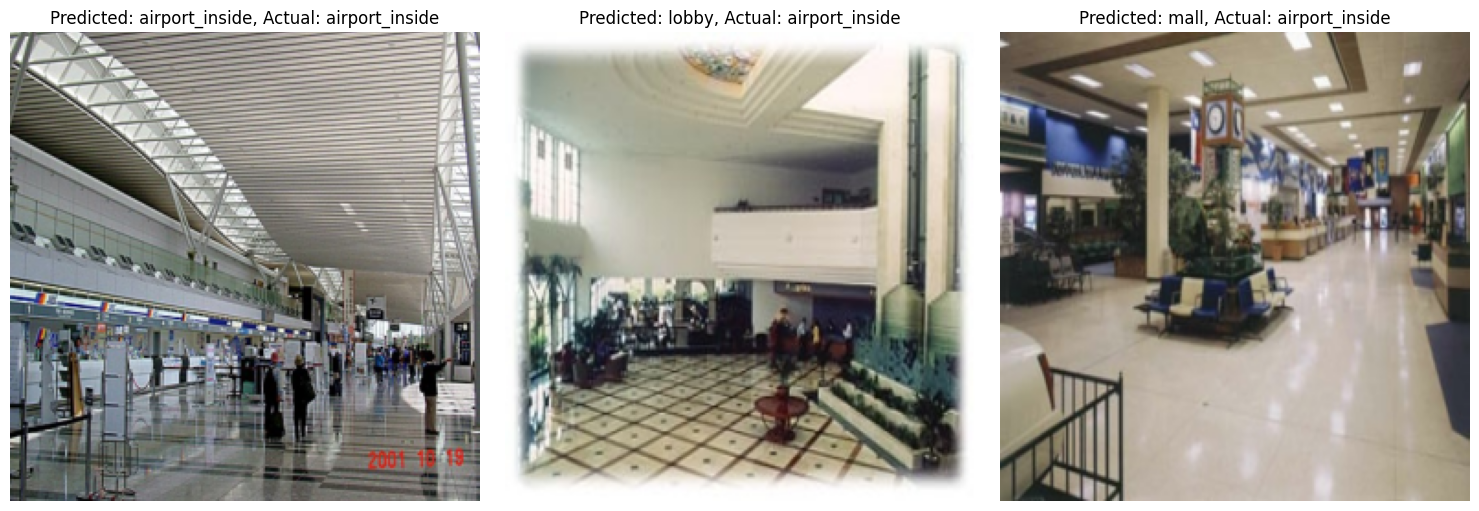

In [20]:
import matplotlib.pyplot as plt

# Select indices for three example images
indices = [0, 2, 10]

# Get the list of all classes in the dataset
classes = dataset.classes

# Preprocess the text descriptions for each class
text_inputs = torch.cat([clip.tokenize(f"a photo of {c}") for c in classes]).to(device)

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Loop through the indices and process each image
for i, idx in enumerate(indices):
    # Select an example image from the dataset
    image, label = dataset[idx] # Get image and label
    # Get the class name corresponding to the label
    class_name = classes[label]

    # Preprocess the image
    image_input = preprocess(image).unsqueeze(0).to(device)

    # Calculate image and text features
    with torch.no_grad():
        image_features = model.encode_image(image_input)
        text_features = model.encode_text(text_inputs)

    # Normalize the features
    image_features /= image_features.norm(dim=-1, keepdim=True)
    text_features /= text_features.norm(dim=-1, keepdim=True)

    # Calculate similarity between image and text features
    similarity = (100.0 * image_features @ text_features.T).softmax(dim=-1)
    values, indices = similarity[0].topk(1)

    # Display the image in the subplot
    # Display the image in the subplot
    axes[i].imshow(image) # Display the PIL Image directly
    axes[i].set_title(f"Predicted: {classes[indices[0]]}, Actual: {class_name}")
    axes[i].axis('off')

# Show the plot
plt.tight_layout()
plt.show()

In [21]:
from torch.utils.data import random_split

# Split dataset into training and validation sets
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])


In [37]:
from torchvision import transforms
from torch.utils.data import Dataset # Import Dataset

# Define a custom dataset class
class CustomDataset(Dataset): # Inherit from Dataset, not 'dataset'
    def __init__(self, data):
        self.data = data
        self.transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize((0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711))
        ])

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        item = self.data[idx]
        image = item['image']  # Assuming your data has an 'image' key
        subcategory = item['label']  # Assuming your data has a 'subCategory' key

        # Assuming 'subcategories' is defined somewhere in your code
        # If not, you need to define it based on your dataset structure
        label = classes.index(subcategory)

        return self.transform(image), label

In [45]:
class CustomDataset(Dataset): # Inherit from Dataset, not 'dataset'
    def __init__(self, data):
        self.data = data
        self.transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize((0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711))
        ])

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # item is now a tuple (image, label)
        image, label = self.data[idx]

        # Apply transforms to the image
        image = self.transform(image)

        return image, label

In [46]:
from torch.utils.data import DataLoader

# Create DataLoader for training and validation sets
train_loader = DataLoader(CustomDataset(train_dataset), batch_size=32, shuffle=True)
val_loader = DataLoader(CustomDataset(val_dataset), batch_size=32, shuffle=False)


In [47]:
import torch.nn as nn

# Modify the model to include a classifier for subcategories
class CLIPFineTuner(nn.Module):
    def __init__(self, model, num_classes):
        super(CLIPFineTuner, self).__init__()
        self.model = model
        self.classifier = nn.Linear(model.visual.output_dim, num_classes)

    def forward(self, x):
        with torch.no_grad():
            features = self.model.encode_image(x).float()  # Convert to float32
        return self.classifier(features)


In [48]:
num_classes = len(classes)
model_ft = CLIPFineTuner(model, num_classes).to(device)


In [49]:
import torch.optim as optim

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_ft.classifier.parameters(), lr=1e-4)


In [52]:
from tqdm import tqdm

# Number of epochs for training
num_epochs = 5

# Training loop
for epoch in range(num_epochs):
    model_ft.train()  # Set the model to training mode
    running_loss = 0.0  # Initialize running loss for the current epoch
    pbar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}, Loss: 0.0000")  # Initialize progress bar

    for image, label in pbar:
        image, label= image.to(device), label.to(device)  # Move images and labels to the device (GPU or CPU)
        optimizer.zero_grad()  # Clear the gradients of all optimized variables
        outputs = model_ft(image)  # Forward pass: compute predicted outputs by passing inputs to the model
        loss = criterion(outputs, label)  # Calculate the loss
        loss.backward()  # Backward pass: compute gradient of the loss with respect to model parameters
        optimizer.step()  # Perform a single optimization step (parameter update)

        running_loss += loss.item()  # Update running loss
        pbar.set_description(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}")  # Update progress bar with current loss

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')  # Print average loss for the epoch

    # Validation
    model_ft.eval()  # Set the model to evaluation mode
    correct = 0  # Initialize correct predictions counter
    total = 0  # Initialize total samples counter

    with torch.no_grad():  # Disable gradient calculation for validation
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)  # Move images and labels to the device
            outputs = model_ft(images)  # Forward pass: compute predicted outputs by passing inputs to the model
            _, predicted = torch.max(outputs.data, 1)  # Get the class label with the highest probability
            total += labels.size(0)  # Update total samples
            correct += (predicted == labels).sum().item()  # Update correct predictions

    print(f'Validation Accuracy: {100 * correct / total}%')  # Print validation accuracy for the epoch

# Save the fine-tuned model
torch.save(model_ft.state_dict(), 'clip_finetuned.pth')  # Save the model's state dictionary


Epoch 1/5, Loss: 3.5648: 100%|██████████| 391/391 [01:56<00:00,  3.35it/s]


Epoch [1/5], Loss: 3.5648
Validation Accuracy: 47.66325224071703%


Epoch 2/5, Loss: 2.5728: 100%|██████████| 391/391 [01:53<00:00,  3.44it/s]


Epoch [2/5], Loss: 2.5728
Validation Accuracy: 64.30857874519846%


Epoch 3/5, Loss: 1.9234: 100%|██████████| 391/391 [01:53<00:00,  3.43it/s]


Epoch [3/5], Loss: 1.9234
Validation Accuracy: 71.79897567221511%


Epoch 4/5, Loss: 1.4915: 100%|██████████| 391/391 [01:53<00:00,  3.45it/s]


Epoch [4/5], Loss: 1.4915
Validation Accuracy: 77.30473751600512%


Epoch 5/5, Loss: 1.2021: 100%|██████████| 391/391 [01:53<00:00,  3.45it/s]


Epoch [5/5], Loss: 1.2021
Validation Accuracy: 80.92189500640205%


In [54]:


# Number of epochs for training
num_epochs = 5

# Training loop
for epoch in range(num_epochs):
    model_ft.train()  # Set the model to training mode
    running_loss = 0.0  # Initialize running loss for the current epoch
    pbar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}, Loss: 0.0000")  # Initialize progress bar

    for image, label in pbar:
        image, label= image.to(device), label.to(device)  # Move images and labels to the device (GPU or CPU)
        optimizer.zero_grad()  # Clear the gradients of all optimized variables
        outputs = model_ft(image)  # Forward pass: compute predicted outputs by passing inputs to the model
        loss = criterion(outputs, label)  # Calculate the loss
        loss.backward()  # Backward pass: compute gradient of the loss with respect to model parameters
        optimizer.step()  # Perform a single optimization step (parameter update)

        running_loss += loss.item()  # Update running loss
        pbar.set_description(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}")  # Update progress bar with current loss

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')  # Print average loss for the epoch



Epoch 1/5, Loss: 0.5828: 100%|██████████| 391/391 [01:54<00:00,  3.42it/s]


Epoch [1/5], Loss: 0.5828


Epoch 2/5, Loss: 0.5457: 100%|██████████| 391/391 [01:54<00:00,  3.42it/s]


Epoch [2/5], Loss: 0.5457


Epoch 3/5, Loss: 0.5149: 100%|██████████| 391/391 [01:54<00:00,  3.41it/s]


Epoch [3/5], Loss: 0.5149


Epoch 4/5, Loss: 0.4890: 100%|██████████| 391/391 [01:54<00:00,  3.40it/s]


Epoch [4/5], Loss: 0.4890


Epoch 5/5, Loss: 0.4673: 100%|██████████| 391/391 [01:57<00:00,  3.34it/s]

Epoch [5/5], Loss: 0.4673


In [56]:
from tqdm import tqdm

# Number of epochs for training
num_epochs = 5

# Training loop


    # Validation
model_ft.eval()  # Set the model to evaluation mode
correct = 0  # Initialize correct predictions counter
total = 0  # Initialize total samples counter

with torch.no_grad():  # Disable gradient calculation for validation
 for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)  # Move images and labels to the device
            outputs = model_ft(images)  # Forward pass: compute predicted outputs by passing inputs to the model
            _, predicted = torch.max(outputs.data, 1)  # Get the class label with the highest probability
            total += labels.size(0)  # Update total samples
            correct += (predicted == labels).sum().item()  # Update correct predictions
            print(f'Validation Accuracy: {100 * correct / total}%')  # Print validation accuracy for the epoch




Validation Accuracy: 81.25%
Validation Accuracy: 85.9375%
Validation Accuracy: 87.5%
Validation Accuracy: 89.84375%
Validation Accuracy: 88.75%
Validation Accuracy: 88.02083333333333%
Validation Accuracy: 87.5%
Validation Accuracy: 88.28125%
Validation Accuracy: 88.19444444444444%
Validation Accuracy: 86.875%
Validation Accuracy: 87.2159090909091%
Validation Accuracy: 87.5%
Validation Accuracy: 87.5%
Validation Accuracy: 87.5%
Validation Accuracy: 87.5%
Validation Accuracy: 87.6953125%
Validation Accuracy: 87.31617647058823%
Validation Accuracy: 87.32638888888889%
Validation Accuracy: 87.5%
Validation Accuracy: 87.65625%
Validation Accuracy: 87.05357142857143%
Validation Accuracy: 87.2159090909091%
Validation Accuracy: 87.22826086956522%
Validation Accuracy: 87.5%
Validation Accuracy: 87.625%
Validation Accuracy: 87.74038461538461%
Validation Accuracy: 87.61574074074075%
Validation Accuracy: 87.83482142857143%
Validation Accuracy: 87.71551724137932%
Validation Accuracy: 87.8125%
Valida

KeyboardInterrupt: 

In [57]:

from google.colab import drive
drive.mount('/content/drive')

# Save the fine-tuned model to Google Drive
save_path = '/content/drive/MyDrive/clip_finetuned.pth'  # Specify the desired save path in your Google Drive
torch.save(model_ft.state_dict(), save_path)
print(f"Model saved to: {save_path}")

Mounted at /content/drive
Model saved to: /content/drive/MyDrive/clip_finetuned.pth


<ipython-input-59-ee80041b416f>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_ft.load_state_dict(torch.load('clip_finetuned.pth'))


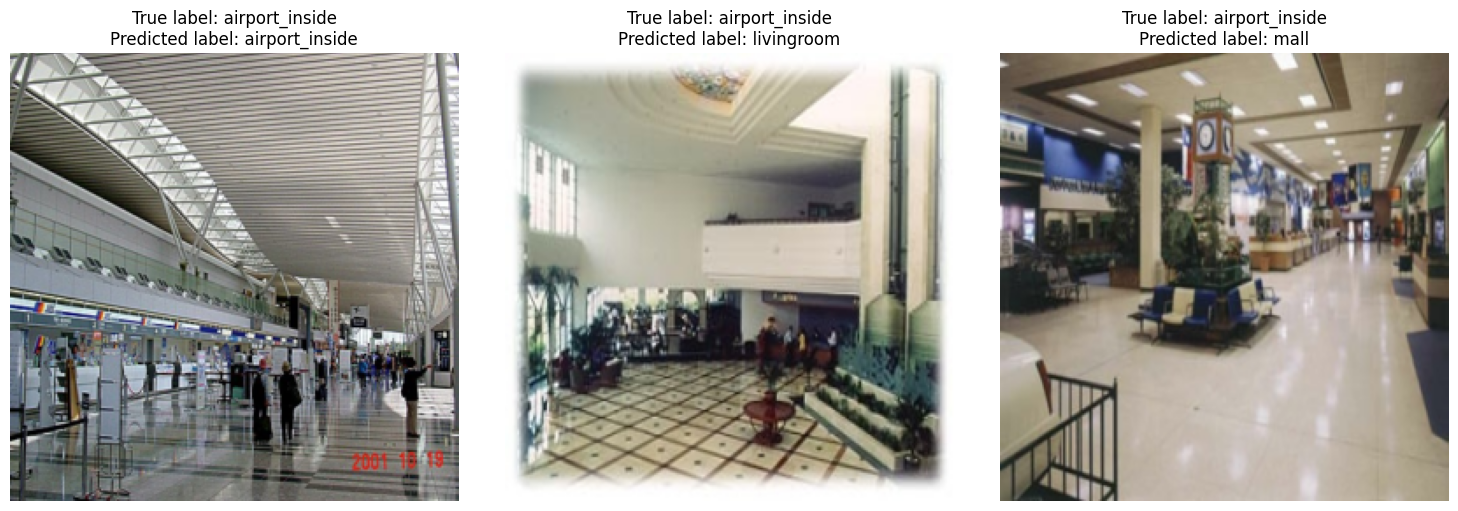

In [59]:
import matplotlib.pyplot as plt
import torch
from torchvision import transforms

# Load the saved model weights
model_ft.load_state_dict(torch.load('clip_finetuned.pth'))
model_ft.eval()  # Set the model to evaluation mode

# Define the indices for the three images
indices = [0, 2, 10]

# Preprocess the image
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711))
])

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Loop through the indices and process each image
for i, idx in enumerate(indices):
    # Get the image and label from the dataset
    image, true_label_idx = dataset[idx]  # Get image and label index
    true_label = dataset.classes[true_label_idx] #Get true label name using the index

    # Transform the image
    image_tensor = transform(image).unsqueeze(0).to(device)  # Add batch dimension and move to device

    # Perform inference
    with torch.no_grad():
        output = model_ft(image_tensor)
        _, predicted_label_idx = torch.max(output, 1)
        predicted_label = dataset.classes[predicted_label_idx.item()] #Get predicted label using index

    # Display the image in the subplot
    axes[i].imshow(image)
    axes[i].set_title(f'True label: {true_label}\nPredicted label: {predicted_label}')
    axes[i].axis('off')

# Show the plot
plt.tight_layout()
plt.show()